In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#### 1.	What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class. 

*Inductive reasoning is when we make generalized conclusions from specific observations.*

    Example:
        
        Observation: Last three weeks 3D movies have released in theatre. 
        Conclusion: Hence next friday also a 3D movie will release.
        
*Deductive reasoning is when we make specific conclusions from generalized observations.*

    Example:
        
        Observation: Last three weeks 3D movies have released in theatre. 
        Conclusion: Hence all theatres in city must had 3D glasses.      

#### Using ONE of the following sources, complete the questions for only that source. 
##### Credit approval: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29
##### Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 
##### Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone - this one is a bit harder since it’s not binary like the others, but if you really want to master these concepts, you should pick this one. Use RMSE as a performance metric if you do this as regression. You should target a value of under 3.  
##### Note: at least one of your models should have the most relevant performance metric above .90 . All performance metrics should be above .75 . You will partially be graded on model performance.


In [2]:
abalone_df = pd.read_csv("../Datasets/abalone/abalone.data")
abalone_df.columns = ['Sex','Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [3]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [4]:
display(abalone_df.shape)

abalone_df.info()

(4176, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
abalone_df['Sex'].value_counts()

M    1527
I    1342
F    1307
Name: Sex, dtype: int64

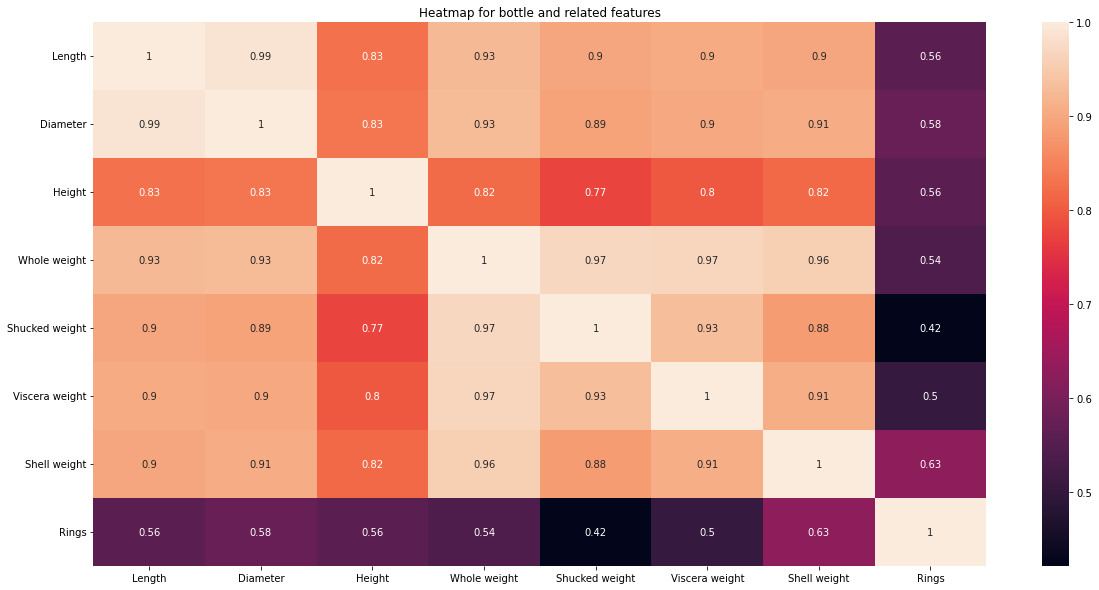

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = abalone_df.corr()
plt.subplots(1,1,figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.title("Heatmap for bottle and related features")
plt.show()

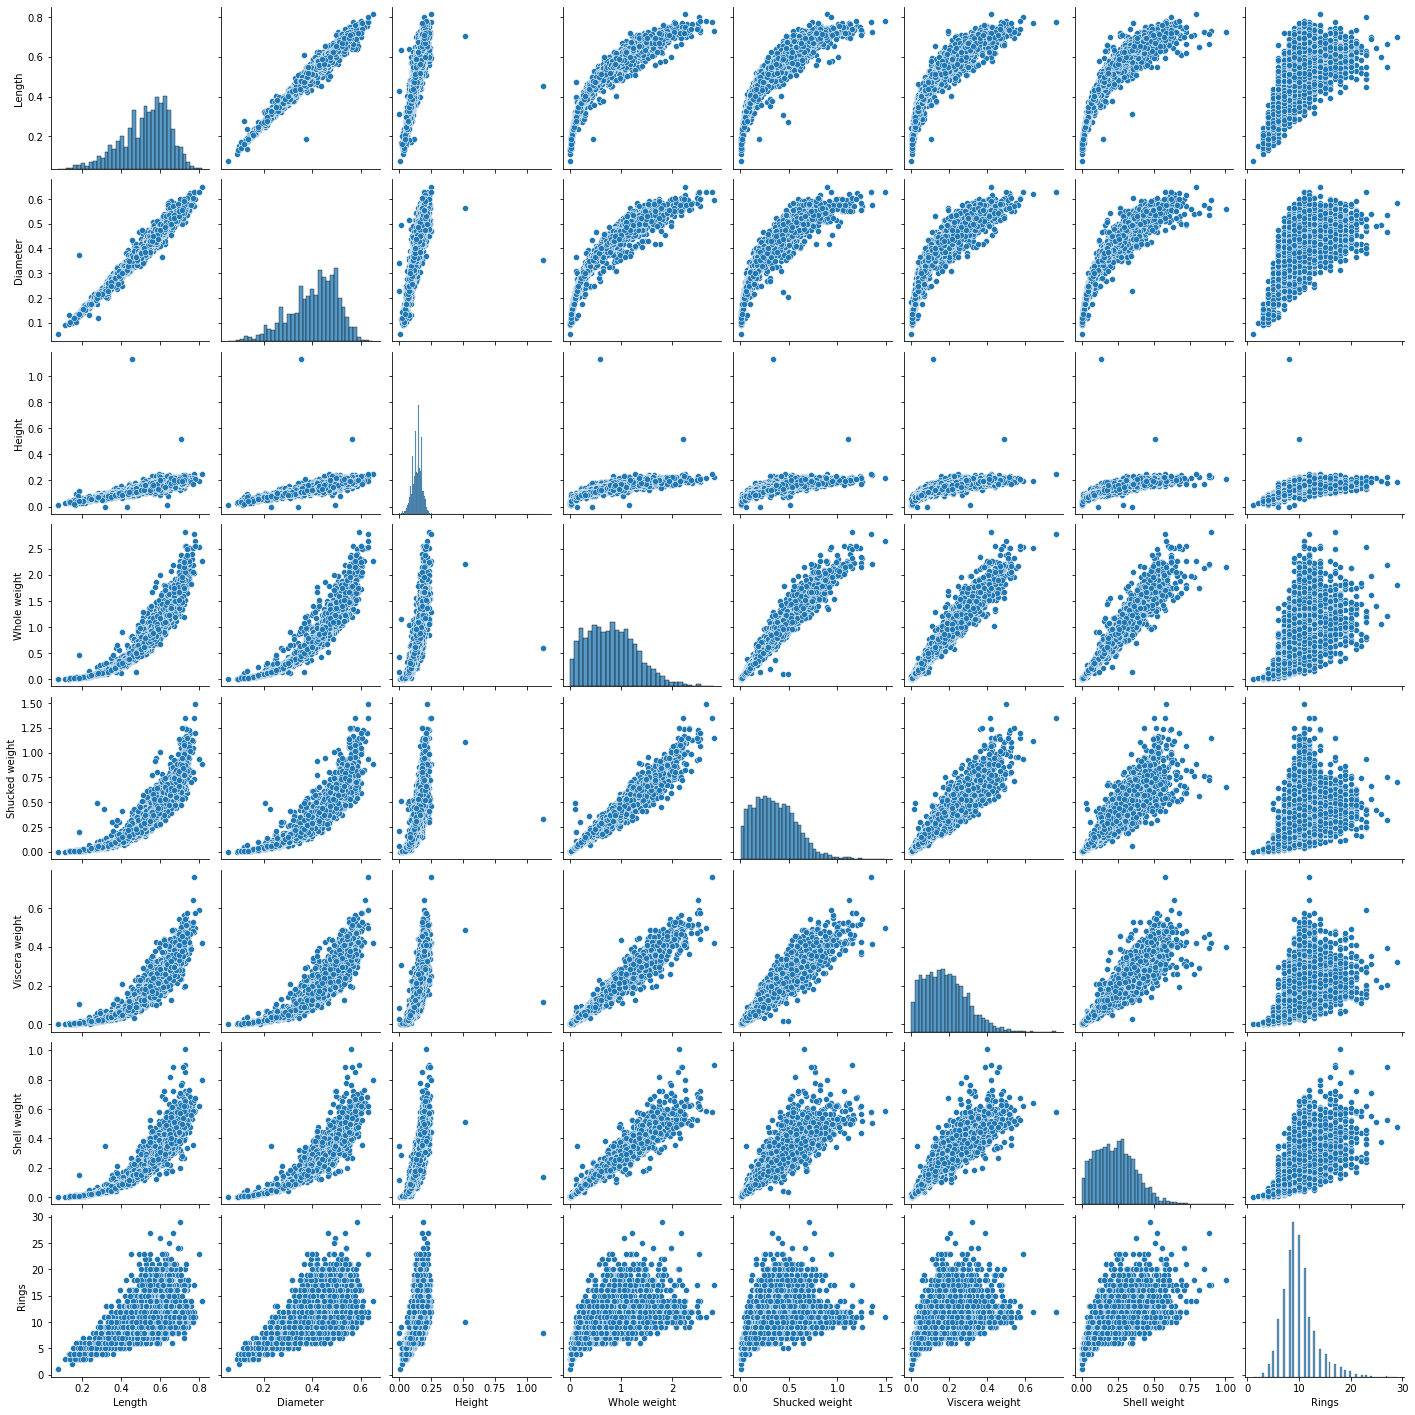

In [7]:
sns.pairplot(abalone_df)
plt.show()

### Data Exploration Analysis

Obervations:

    1. The dataset has 9 features with more than 4000 observations. Out of the 9 featured, Rings is the target variable. 
    Rings correspond to the age of Abalone.
    2. No nulls or NANs oberved. Some outliers observes in pairplot. Can be addressed with Imputer.
    3. Sex is a non numerical categorical data with 3 values. Need to use One hot encoder or get_dummies on it.
    4. As per heat map Sex of the Abalone has no to weak correlation to Rings (Age).

#### 2.	Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t. 

*Converting categorical data using pandas get_dummies*

*Using imputer, Standard Scalar in pipline for preprocessing.*

*Splitting data into train and test data*

*Converting categorical to numerical was not required as it is excluded during feature selection*

In [8]:
abalone_df = pd.get_dummies(abalone_df,prefix=["Sex"], columns = ["Sex"], drop_first=True)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipe = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('scaler', StandardScaler()),
    ])

In [10]:
# performing linear regression startified sampling
X = abalone_df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
y = abalone_df['Rings']

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 ,random_state=32)

X_train = pipe.fit_transform(X_train)

#### 3.	Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

*Used GridSearch Cross Validation to tune few hyperparameters on mean squared error scoring to get the best score*

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {'max_features': [2, 4, 6, 7], 'min_samples_leaf':[0.12, 0.18, 0.2, 0.26]}

dt = DecisionTreeRegressor(criterion="squared_error", random_state = 25)

grid = GridSearchCV(dt, param_grid, cv=5, scoring="neg_mean_squared_error")

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=25),
             param_grid={'max_features': [2, 4, 6, 7],
                         'min_samples_leaf': [0.12, 0.18, 0.2, 0.26]},
             scoring='neg_mean_squared_error')

In [12]:
print("Best RMSE score is ",np.sqrt(-grid.best_score_))
grid.best_estimator_

Best RMSE score is  2.483778261773966


DecisionTreeRegressor(max_features=7, min_samples_leaf=0.12, random_state=25)

#### 4.	Create a random forest model tuned to the best of your abilities. Explain how you tuned it.


*Used GridSearch Cross Validation to tune few hyperparameters on mean squared error scoring to get the best score*

In [13]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators': [100, 300, 500], 'max_features': [2, 4, 6, 7], 'bootstrap': [True,False]}

forest = RandomForestRegressor(random_state=25)
gridF = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error")
gridF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=25),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 4, 6, 7],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_mean_squared_error')

In [14]:
print("Best RMSE score is ",np.sqrt(-gridF.best_score_))
gridF.best_params_

Best RMSE score is  2.1723760337395115


{'bootstrap': True, 'max_features': 2, 'n_estimators': 500}

#### 5.	Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 


*Used GridSearch Cross Validation to tune few hyperparameters on mean squared error scoring to get the best score*

In [15]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(random_state=25)

param_grid = {'objective':['reg:squarederror'], 'booster':['gbtree'],
              'learning_rate': [.03, 0.05, .07], 'n_estimators': [100,300,500],
             'colsample_bytree':[0.8], 'max_depth':[6,8,10,12]}

gridX = GridSearchCV(xgbr, param_grid, cv=5, scoring="neg_mean_squared_error")
gridX.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=25, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    valid

In [16]:
print("Best RMSE score is ",np.sqrt(-gridX.best_score_))
gridX.best_params_

Best RMSE score is  2.198865227094864


{'booster': 'gbtree',
 'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 6,
 'n_estimators': 100,
 'objective': 'reg:squarederror'}

#### 6.	Which model performed best? What is your performance metric? Why? 


In [17]:
from sklearn.metrics import mean_squared_error

final_model = gridX.best_estimator_
y_pred = final_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
rmse

3.2027740567519243

*Of all the models XGBoost performed the best. Gradient Bossting feature helped us get the best possible model.*

*The performance metric used here is Root Mean Squared Error. This was used as the Abalone data set's target variable is continuous data and not a categorical one. Hence it makes more sense to take RMSE, which is the difference between the actual and the predicted data, as a metric to evaluate the model.*

#### Datacamp's Machine Learning with Tree-Based Models

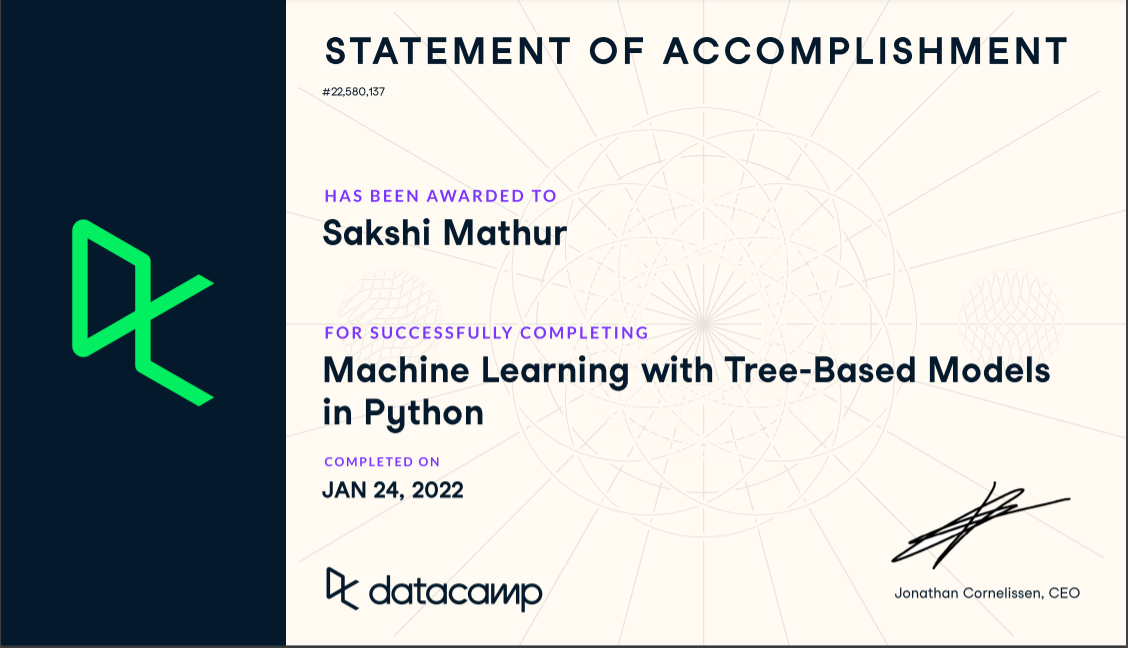